In [98]:
from sklearn.datasets import load_diabetes
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.decomposition import PCA
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [99]:
data = load_diabetes()
x = data.data
df = pd.DataFrame(x,columns=data.feature_names)
feature = data.feature_names
print(df.head())

        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  
0 -0.002592  0.019907 -0.017646  
1 -0.039493 -0.068332 -0.092204  
2 -0.002592  0.002861 -0.025930  
3  0.034309  0.022688 -0.009362  
4 -0.002592 -0.031988 -0.046641  


In [100]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
x_scaled_df = pd.DataFrame(x_scaled,columns=data.feature_names)


In [101]:
pca = PCA()
x_pca = pca.fit_transform(x_scaled)
x_pcadf = pd.DataFrame(x_pca)
x_pcadf

 


,0,1,2,3,4,5,6,7,8,9
0,0.587199,-1.946832,0.589205,0.082816,0.256680,-1.011210,-0.179844,-0.757431,-0.181075,-0.048953
1,-2.831625,1.372082,0.027930,0.470008,0.143269,-1.013015,0.224398,0.188436,0.505128,0.043599
2,0.272129,-1.634901,0.739244,0.791492,1.163870,-1.112763,-0.462452,-0.843203,-0.025353,-0.054175
3,0.049281,0.382278,-2.013032,-1.373216,-0.255570,0.445288,0.482102,0.367871,-0.137857,-0.074558
4,-0.756421,0.811960,-0.057238,0.137495,0.133402,-0.814559,0.436536,1.059751,0.044284,-0.010914
...,...,...,...,...,...,...,...,...,...,...
437,1.239525,-1.035968,0.928679,0.656264,-0.204296,-0.479385,0.394415,-0.126490,-0.377893,-0.025229
438,1.264719,0.761319,-1.750191,1.133464,0.093975,0.973445,-1.173498,-0.180439,-0.371759,0.033447
439,-0.205206,-1.205487,0.496186,1.353370,0.141574,-0.045351,-0.635396,0.491849,-0.113220,0.058875
440,0.692871,0.210127,-0.868724,-1.616793,-0.119624,-0.556907,0.545701,-0.078684,-0.127211,-0.045540


In [102]:
variance_e = pca.explained_variance_ratio_
vardf = pd.DataFrame(variance_e)
print(vardf)


          0
0  0.402421
1  0.149232
2  0.120597
3  0.095548
4  0.066218
5  0.060272
6  0.053657
7  0.043368
8  0.007832
9  0.000856


In [103]:
cumulative_variance = np.cumsum(variance_e)
cumulative_variance

array([0.40242108, 0.55165304, 0.67224967, 0.76779731, 0.83401545,
       0.89428716, 0.94794372, 0.99131192, 0.99914393, 1.        ])

In [104]:
n_components80 = np.argmax(cumulative_variance>=0.8)+1
n_components90 = np.argmax(cumulative_variance>=0.9)+1
print(n_components80)
print(n_components90)

5
7


In [105]:

pca1 = PCA(n_components=3)
pca1
pca1.fit(x_scaled)
loadings = pca1.components_.T
dfload = pd.DataFrame(loadings,columns=["pc1","pc2","pc3"],index=feature)
print(dfload)

          pc1       pc2       pc3
age  0.216431  0.044367  0.494668
sex  0.186967 -0.386547 -0.106864
bmi  0.303162 -0.156281  0.167527
bp   0.271738 -0.138266  0.513571
s1   0.343255  0.573027 -0.068579
s2   0.351861  0.455942 -0.269689
s3  -0.282437  0.506239  0.386032
s4   0.428834 -0.068181 -0.380680
s5   0.378618 -0.026187  0.063630
s6   0.322183 -0.084949  0.276842


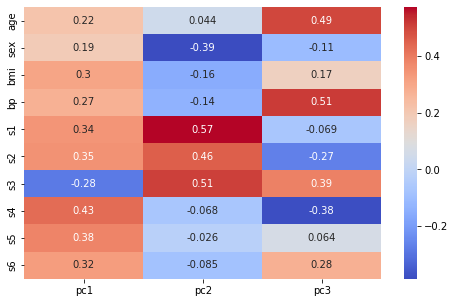

In [106]:
plt.figure(figsize=(8,5))
sns.heatmap(dfload,annot=True,cmap="coolwarm")
plt.show()
